In [1]:
#first i will install the required library
import pandas as pd
import numpy as np
!pip install folium
import folium
!pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors

     |████████████████████████████████| 94 kB 5.8 MB/s  eta 0:00:01


In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df_india = df[df['Country Code'] ==1]
df_ndls = df_india[df_india['City']=='New Delhi']
df_ndls.reset_index(drop=True,inplace=True)
df_ndls.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
1,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
3,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
4,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238


# DATA CLEANING 
remove all the unwanted columns and rows

In [4]:
df_delhi = df_ndls[df_ndls['Longitude']!=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_delhi = df_delhi[df_delhi['Aggregate rating']!=0.0]
df_delhi.reset_index(drop=True,inplace=True)
df_delhi.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Burger.in,Adchini,77.196923,28.535382,Fast Food,3.2,Average,46
1,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",3.4,Average,45
2,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",2.6,Average,11
3,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",3.4,Average,238
4,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,3.1,Average,8


In [5]:
df_delhi.shape

(3975, 8)

# Clustering of restaurants


In [6]:
df_delhi['Longitude'].mean()

77.20073658720754

In [7]:
from sklearn.cluster import KMeans 

In [8]:
delhi_map = folium.Map(location=[28.52, 77.25], zoom_start=12)
X = df_delhi['Latitude']
Y = df_delhi['Longitude']
Z = np.stack((X,Y),axis=1)
kmodel = KMeans(n_clusters=5, random_state=0).fit(Z)
clusters = kmodel.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df['Cluster'] = clusters
for latitude , longitude , locality , cluster in zip(df_delhi['Latitude'],df_delhi['Longitude'],df_delhi['Locality'],df_delhi['Cluster']):
    label = folium.popup(locality,parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(delhi_map)
        
delhi_map                                   

ValueError: Length of values does not match length of index

# which places have best restaurants in New Delhi

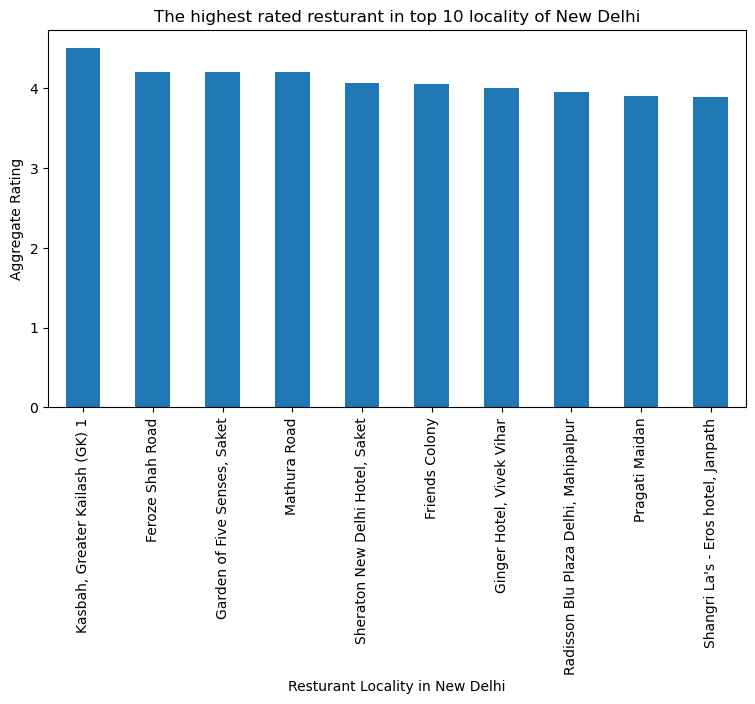

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_delhi.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


# which locality have worst restaurants?

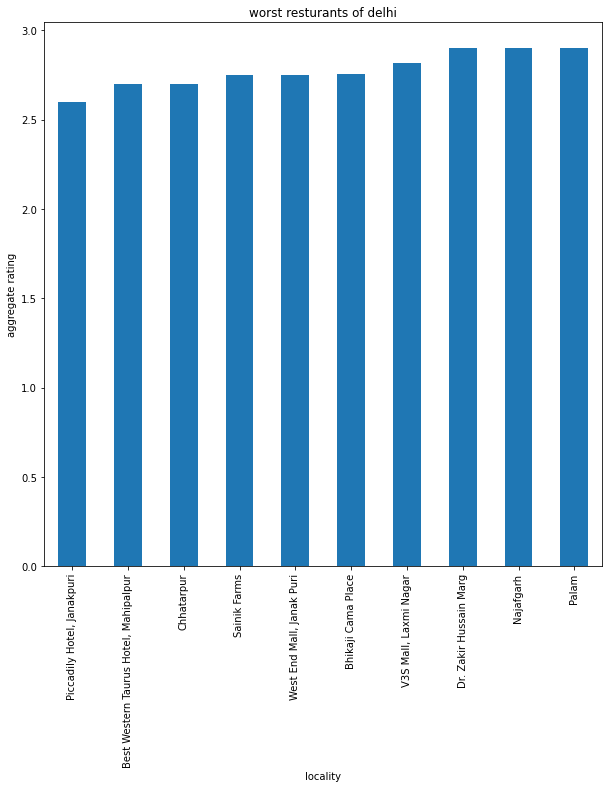

In [10]:
plt.figure(figsize=(10,10))
plt.title('worst resturants of delhi')
df_delhi.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')
plt.xlabel('locality')
plt.ylabel('aggregate rating')
plt.show()

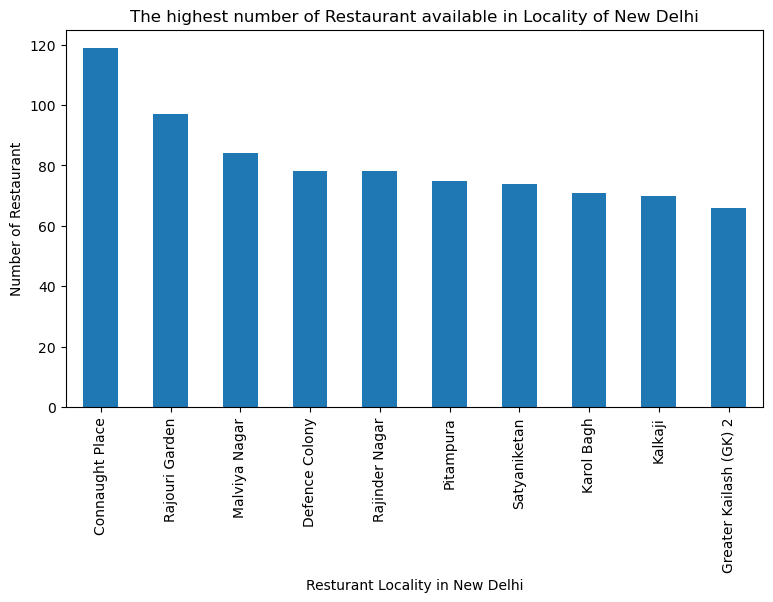

In [11]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_delhi.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


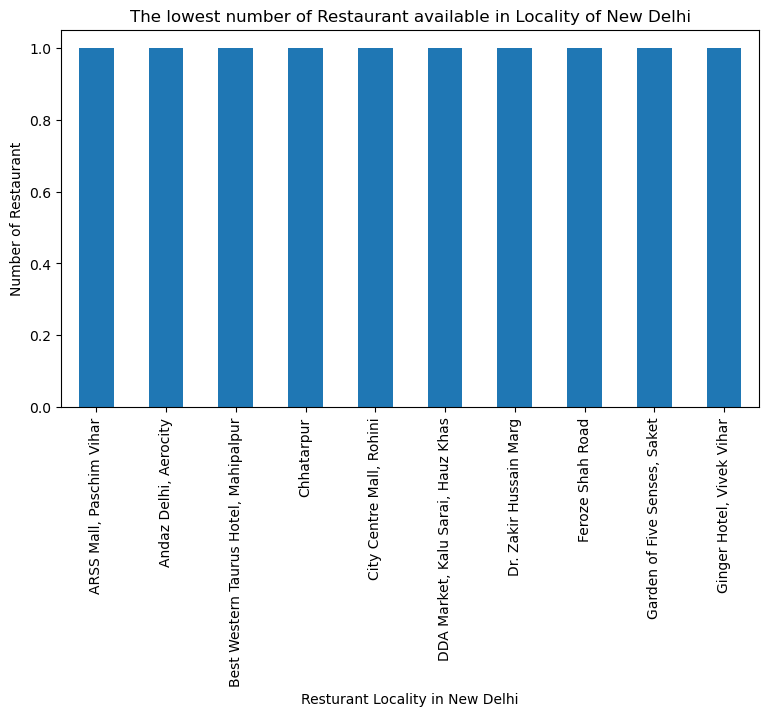

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_delhi.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


# what are the best places for chinese restaurants in new delhi?

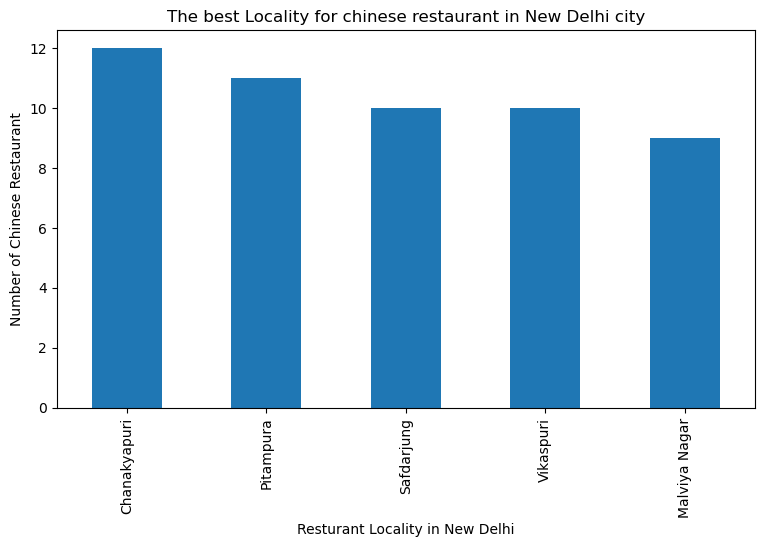

In [13]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_delhi[df_delhi['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

# Best chinese cuisine restaurants in delhi

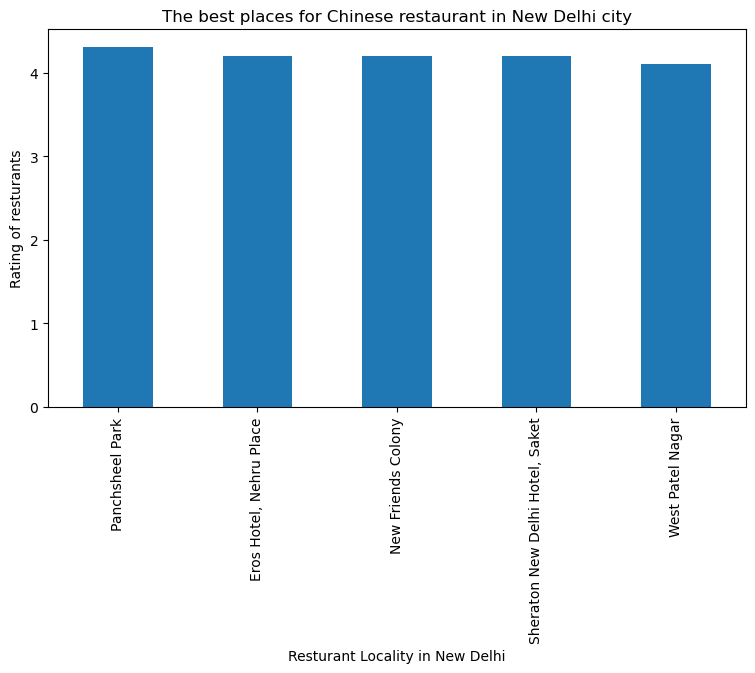

In [14]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_delhi[df_delhi['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

# Data Transformation
based on locality grouping the data

In [15]:
df_delhi_Loc =  df_delhi.groupby('Locality').count()['Restaurant Name'].to_frame()
df_delhi_rating= df_delhi.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_delhi.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_delhi.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_delhi.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_delhi.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_delhi.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_delhi_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_delhi_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [16]:

df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,1,"North Indian, South Indian, Chinese, Mithai, F...",3.100000,Average,117
1,Adchini,28.537063,77.197808,13,"Fast Food, North Indian, Seafood, Continental,...",3.292308,"Average, Good, Poor, Very Good",1560
2,"Aditya Mega Mall, Karkardooma",28.656131,77.301266,4,"Finger Food, North Indian, Mughlai, Pizza, Fas...",3.275000,"Average, Good",434
3,Aerocity,28.553077,77.104270,2,"Fast Food, Italian, Pizza, North Indian, Conti...",3.200000,Average,59
4,"Aggarwal City Mall, Pitampura",28.690020,77.134650,3,"North Indian, Chinese, Street Food, Mithai, No...",3.033333,Average,126


In [17]:
df_final.shape

(240, 8)

In [18]:
CLIENT_ID = 'NU55JPXCH2OY01L4AOVWK4PEVCRDEFWAYZSK0LV0CAFVKQ4W'
CLIENT_SECRET = 'ZZDBO0KJFPWOIY3FZ5RFAGAZGXWEBCZ01BWCSITLW5PSCYI0'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NU55JPXCH2OY01L4AOVWK4PEVCRDEFWAYZSK0LV0CAFVKQ4W
CLIENT_SECRET:ZZDBO0KJFPWOIY3FZ5RFAGAZGXWEBCZ01BWCSITLW5PSCYI0


# Create a function to repeat the same process to all locality in delhi

In [19]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)           

In [20]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [21]:
new_Delhi_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Subway,28.669999,77.102546,Sandwich Place
1,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Pizza Hut,28.670321,77.103853,Pizza Place
2,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Café Coffee Day,28.670009,77.102480,Coffee Shop
3,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Baljeet's Amritsari Koolcha,28.665768,77.100481,Indian Restaurant
4,"ARSS Mall, Paschim Vihar",28.668945,77.101544,Little Chef,28.670000,77.101459,Chinese Restaurant


In [22]:
new_Delhi_venues.shape

(3202, 7)

In [23]:
new_Delhi_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ARSS Mall, Paschim Vihar",10,10,10,10,10,10
Adchini,7,7,7,7,7,7
"Aditya Mega Mall, Karkardooma",10,10,10,10,10,10
Aerocity,7,7,7,7,7,7
"Aggarwal City Mall, Pitampura",5,5,5,5,5,5
...,...,...,...,...,...,...
"West Gate Mall, Rajouri Garden",14,14,14,14,14,14
West Patel Nagar,6,6,6,6,6,6
"Worldmark 1, Aerocity",30,30,30,30,30,30


In [24]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 211 uniques categories.


In [25]:
#analyze each locality
#one hat encoding
delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']])
#add locality column
delhi_onehot['Locality'] = new_Delhi_venues['Locality']
#move locality to first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head()

,Locality,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_Airport,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,...,Venue Category_Trail,Venue Category_Train Station,Venue Category_Turkish Restaurant,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Women's Store
0,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
delhi_onehot.shape

(3202, 212)

In [27]:
delhi_grouped = delhi_onehot.groupby('Locality').mean().reset_index()
delhi_grouped.head()

,Locality,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_Airport,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,...,Venue Category_Trail,Venue Category_Train Station,Venue Category_Turkish Restaurant,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Women's Store
0,"ARSS Mall, Paschim Vihar",0.1,0.1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adchini,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Aditya Mega Mall, Karkardooma",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aerocity,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Aggarwal City Mall, Pitampura",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
delhi_grouped.shape

(238, 212)

# Lets print each locality along with 5 top most venues

In [29]:
num_top_venues = 5
for loc in delhi_grouped['Locality']:
    print("----"+loc+"----")
    temp = delhi_grouped[delhi_grouped['Locality'] == loc].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

----ARSS Mall, Paschim Vihar----
                               venue  freq
0   Venue Category_Indian Restaurant   0.2
1                 Venue Category_ATM   0.1
2              Venue Category_Market   0.1
3         Venue Category_Coffee Shop   0.1
4  Venue Category_Chinese Restaurant   0.1


----Adchini----
                              venue  freq
0               Venue Category_Café  0.29
1         Venue Category_Restaurant  0.14
2   Venue Category_Parsi Restaurant  0.14
3  Venue Category_Indian Restaurant  0.14
4                Venue Category_Pub  0.14


----Aditya Mega Mall, Karkardooma----
                              venue  freq
0        Venue Category_Pizza Place   0.2
1          Venue Category_Multiplex   0.2
2      Venue Category_Shopping Mall   0.2
3  Venue Category_Indian Restaurant   0.2
4               Venue Category_Café   0.1


----Aerocity----
                                 venue  freq
0                 Venue Category_Hotel  0.29
1           Venue Category_Coffee Shop

                               venue  freq
0    Venue Category_Asian Restaurant  0.14
1      Venue Category_Clothing Store  0.14
2       Venue Category_Shopping Mall  0.14
3  Venue Category_Light Rail Station  0.14
4               Venue Category_Hotel  0.14


----Crowne Plaza, Mayur Vihar Phase 1----
                              venue  freq
0              Venue Category_Hotel  0.38
1  Venue Category_Indian Restaurant  0.08
2         Venue Category_Restaurant  0.08
3   Venue Category_Asian Restaurant  0.08
4             Venue Category_Arcade  0.08


----D Mall, Netaji Subhash Place----
                                 venue  freq
0  Venue Category_Fast Food Restaurant  0.18
1     Venue Category_Indian Restaurant  0.18
2           Venue Category_Coffee Shop  0.12
3         Venue Category_Shopping Mall  0.12
4           Venue Category_Pizza Place  0.06


----DDA Market, Kalu Sarai, Hauz Khas----
                               venue  freq
0  Venue Category_Chinese Restaurant   0.2
1      

                                 venue  freq
0                 Venue Category_Plaza  0.11
1        Venue Category_Cricket Ground  0.11
2         Venue Category_Historic Site  0.11
3  Venue Category_Fast Food Restaurant  0.11
4            Venue Category_Art Museum  0.11


----India Gate----
                                venue  freq
0  Venue Category_Government Building  0.25
1          Venue Category_Music Venue  0.25
2        Venue Category_National Park  0.25
3            Venue Category_Rest Area  0.25
4                  Venue Category_ATM  0.00


----JMD Kohinoor Mall, Greater Kailash----
                               venue  freq
0                Venue Category_Café  0.14
1          Venue Category_Restaurant  0.09
2         Venue Category_Pizza Place  0.09
3  Venue Category_Chinese Restaurant  0.09
4      Venue Category_Ice Cream Shop  0.09


----JNU----
                                    venue  freq
0           Venue Category_Clothing Store  0.25
1            Venue Category_Shop

                                       venue  freq
0           Venue Category_Indian Restaurant  0.15
1          Venue Category_Italian Restaurant  0.08
2                        Venue Category_Café  0.08
3              Venue Category_Sandwich Place  0.08
4  Venue Category_Modern European Restaurant  0.08


----Lodhi Road----
                               venue  freq
0  Venue Category_Italian Restaurant  0.06
1         Venue Category_Flea Market  0.06
2                Venue Category_Café  0.06
3  Venue Category_Chinese Restaurant  0.06
4      Venue Category_History Museum  0.06


----MG Road----
                                   venue  freq
0  Venue Category_Furniture / Home Store  0.25
1       Venue Category_Indian Restaurant  0.25
2       Venue Category_Electronics Store  0.25
3              Venue Category_Art Museum  0.25
4                     Venue Category_ATM  0.00


----MGF Metropolitan Mall, Saket----
                               venue  freq
0   Venue Category_Indian Restaur

                               venue  freq
0                Venue Category_Café  0.20
1  Venue Category_Italian Restaurant  0.07
2   Venue Category_Indian Restaurant  0.07
3              Venue Category_Lounge  0.07
4               Venue Category_Hotel  0.07


----Nizamuddin----
                                venue  freq
0               Venue Category_Garden   0.2
1    Venue Category_Indian Restaurant   0.2
2                 Venue Category_Park   0.1
3  Venue Category_Monument / Landmark   0.1
4        Venue Category_Historic Site   0.1


----Okhla Phase 1----
                                    venue  freq
0           Venue Category_Cosmetics Shop  0.33
1               Venue Category_Print Shop  0.33
2  Venue Category_Health & Beauty Service  0.33
3                      Venue Category_ATM  0.00
4  Venue Category_North Indian Restaurant  0.00


----PVR Anupam Complex----
                                      venue  freq
0  Venue Category_Middle Eastern Restaurant  0.11
1               

                               venue  freq
0               Venue Category_Hotel  0.20
1                 Venue Category_Spa  0.12
2   Venue Category_Indian Restaurant  0.12
3          Venue Category_Restaurant  0.08
4  Venue Category_Chinese Restaurant  0.08


----Shanti Niketan Marg----
                                    venue  freq
0              Venue Category_Pizza Place  0.25
1             Venue Category_Gourmet Shop  0.25
2        Venue Category_Convenience Store  0.25
3                     Venue Category_Café  0.25
4  Venue Category_North Indian Restaurant  0.00


----Sheikh Sarai----
                               venue  freq
0     Venue Category_Thai Restaurant  0.38
1  Venue Category_Italian Restaurant  0.12
2          Venue Category_Whisky Bar  0.12
3                Venue Category_Café  0.12
4       Venue Category_Historic Site  0.12


----Sheraton New Delhi Hotel, Saket----
                              venue  freq
0  Venue Category_Indian Restaurant  0.14
1     Venue Categ



----V3S Mall, Laxmi Nagar----
                                 venue  freq
0             Venue Category_Gift Shop  0.12
1             Venue Category_Multiplex  0.06
2                Venue Category_Bakery  0.06
3          Venue Category_Dessert Shop  0.06
4  Venue Category_Fast Food Restaurant  0.06


----Vasant Kunj----
                                          venue  freq
0                    Venue Category_Pizza Place  0.14
1                   Venue Category_Dessert Shop  0.14
2  Venue Category_Vegetarian / Vegan Restaurant  0.14
3                            Venue Category_Bar  0.14
4           Venue Category_Fast Food Restaurant  0.14


----Vasant Square Mall, Vasant Kunj----
                                          venue  freq
0                   Venue Category_Dessert Shop  0.11
1                 Venue Category_Sandwich Place  0.11
2                    Venue Category_Pizza Place  0.11
3  Venue Category_Vegetarian / Vegan Restaurant  0.11
4                           Venue Catego

# Let's put that into a dataframe

In [30]:
def return_most_common_venues(row,num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Locality'] = delhi_grouped['Locality']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ARSS Mall, Paschim Vihar",Venue Category_Indian Restaurant,Venue Category_Sandwich Place,Venue Category_Market,Venue Category_Multicuisine Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Chinese Restaurant,Venue Category_ATM,Venue Category_Pizza Place,Venue Category_Accessories Store,Venue Category_Fish & Chips Shop
1,Adchini,Venue Category_Café,Venue Category_Restaurant,Venue Category_Indian Restaurant,Venue Category_Parsi Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Women's Store,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop
2,"Aditya Mega Mall, Karkardooma",Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Shopping Mall,Venue Category_Multiplex,Venue Category_Hotel,Venue Category_Café,Venue Category_Farmers Market,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
3,Aerocity,Venue Category_Hotel,Venue Category_Airport Terminal,Venue Category_Airport Lounge,Venue Category_Rental Car Location,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Farmers Market,Venue Category_Food & Drink Shop
4,"Aggarwal City Mall, Pitampura",Venue Category_Pizza Place,Venue Category_Café,Venue Category_Donut Shop,Venue Category_Department Store,Venue Category_Indian Restaurant,Venue Category_Indian Chinese Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court


In [32]:
neighborhoods_venues_sorted.shape

(238, 11)

In [33]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Delhi_clustering = delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 4, 0, 3, 0, 1, 4, 4, 4, 4], dtype=int32)

In [41]:
label = kmeans.labels_
label2 = np.append(label,[2])
label2 = np.append(label2,[2])
label2.shape

(240,)

In [42]:
# add clustering labels
Delhi_merged = df_final.head(240)
Delhi_merged['Cluster Labels'] = label2

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
Delhi_merged = Delhi_merged.join(neighborhoods_venues_sorted.set_index('Locality'),lsuffix='Locality', on='Locality')

Delhi_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,1,"North Indian, South Indian, Chinese, Mithai, F...",3.100000,Average,117,0,Venue Category_Indian Restaurant,Venue Category_Sandwich Place,Venue Category_Market,Venue Category_Multicuisine Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Chinese Restaurant,Venue Category_ATM,Venue Category_Pizza Place,Venue Category_Accessories Store,Venue Category_Fish & Chips Shop
1,Adchini,28.537063,77.197808,13,"Fast Food, North Indian, Seafood, Continental,...",3.292308,"Average, Good, Poor, Very Good",1560,4,Venue Category_Café,Venue Category_Restaurant,Venue Category_Indian Restaurant,Venue Category_Parsi Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Women's Store,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop
2,"Aditya Mega Mall, Karkardooma",28.656131,77.301266,4,"Finger Food, North Indian, Mughlai, Pizza, Fas...",3.275000,"Average, Good",434,0,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Shopping Mall,Venue Category_Multiplex,Venue Category_Hotel,Venue Category_Café,Venue Category_Farmers Market,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
3,Aerocity,28.553077,77.104270,2,"Fast Food, Italian, Pizza, North Indian, Conti...",3.200000,Average,59,3,Venue Category_Hotel,Venue Category_Airport Terminal,Venue Category_Airport Lounge,Venue Category_Rental Car Location,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Farmers Market,Venue Category_Food & Drink Shop
4,"Aggarwal City Mall, Pitampura",28.690020,77.134650,3,"North Indian, Chinese, Street Food, Mithai, No...",3.033333,Average,126,0,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Donut Shop,Venue Category_Department Store,Venue Category_Indian Restaurant,Venue Category_Indian Chinese Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court


In [44]:
map_clusters = folium.Map(location=[28.52, 77.25],zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Delhi_merged['Lat'],Delhi_merged['Lng'],Delhi_merged['Locality'],Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
## Examine Clusters

## Cluster 1
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 0, Delhi_merged.columns[[1] + list(range(5, Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.668945,3.100000,Average,117,0,Venue Category_Indian Restaurant,Venue Category_Sandwich Place,Venue Category_Market,Venue Category_Multicuisine Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Chinese Restaurant,Venue Category_ATM,Venue Category_Pizza Place,Venue Category_Accessories Store,Venue Category_Fish & Chips Shop
2,28.656131,3.275000,"Average, Good",434,0,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Shopping Mall,Venue Category_Multiplex,Venue Category_Hotel,Venue Category_Café,Venue Category_Farmers Market,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
4,28.690020,3.033333,Average,126,0,Venue Category_Pizza Place,Venue Category_Café,Venue Category_Donut Shop,Venue Category_Department Store,Venue Category_Indian Restaurant,Venue Category_Indian Chinese Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
13,28.690182,3.090000,"Average, Good, Poor",971,0,Venue Category_Pizza Place,Venue Category_BBQ Joint,Venue Category_Market,Venue Category_Dessert Shop,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_Indian Restaurant,Venue Category_Airport Service,Venue Category_Fast Food Restaurant,Venue Category_Furniture / Home Store
16,28.630440,3.208333,"Average, Good, Poor",1779,0,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Bakery,Venue Category_Hotel,Venue Category_Theater,Venue Category_Eastern European Restaurant,Venue Category_Nightclub,Venue Category_Art Gallery,Venue Category_Train Station,Venue Category_Arcade
23,28.656414,3.358182,"Average, Good, Very Good",6668,0,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Dessert Shop,Venue Category_Market,Venue Category_Light Rail Station,Venue Category_Train Station,Venue Category_Restaurant,Venue Category_Smoke Shop,Venue Category_Paper / Office Supplies Store,Venue Category_Discount Store
25,28.495624,2.700000,Average,23,0,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Luggage Store,Venue Category_Donut Shop,Venue Category_Light Rail Station,Venue Category_Food Court,Venue Category_Flea Market,Venue Category_Food,Venue Category_Food & Drink Shop
33,28.657388,3.320000,"Average, Good",636,0,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Burger Joint,Venue Category_Hotel,Venue Category_Café,Venue Category_Farmers Market,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
42,28.576161,2.983333,"Average, Good, Poor",542,0,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Shopping Mall,Venue Category_Market,Venue Category_Dessert Shop,Venue Category_Department Store,Venue Category_Restaurant,Venue Category_Women's Store,Venue Category_Pizza Place,Venue Category_Garden
43,28.643320,3.287500,"Average, Good, Poor, Very Good",2570,0,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Hotel,Venue Category_Hostel,Venue Category_Asian Restaurant,Venue Category_Movie Theater,Venue Category_Road,Venue Category_Flea Market,Venue Category_Fast Food Restaurant,Venue Category_Fish & Chips Shop


In [46]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 1, Delhi_merged.columns[[1] + list(range(5, Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,28.700516,3.040000,"Average, Good, Poor",594,1,Venue Category_Pizza Place,Venue Category_Multiplex,Venue Category_Sandwich Place,Venue Category_Gym / Fitness Center,Venue Category_Fast Food Restaurant,Venue Category_Farmers Market,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop
11,28.562580,3.750000,"Average, Good, Very Good",875,1,Venue Category_Fast Food Restaurant,Venue Category_Shopping Mall,Venue Category_Sporting Goods Shop,Venue Category_Karaoke Bar,Venue Category_Women's Store,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
15,28.691136,3.390909,"Average, Good, Very Good",485,1,Venue Category_Pizza Place,Venue Category_Fast Food Restaurant,Venue Category_South Indian Restaurant,Venue Category_Shopping Mall,Venue Category_Restaurant,Venue Category_Dim Sum Restaurant,Venue Category_Dessert Shop,Venue Category_Deli / Bodega,Venue Category_French Restaurant,Venue Category_Department Store
22,28.654105,3.085714,Average,80,1,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Farmers Market,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Food
24,28.649658,3.800000,"Average, Excellent, Good, Very Good",1410,1,Venue Category_Indian Restaurant,Venue Category_Light Rail Station,Venue Category_Paper / Office Supplies Store,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Hardware Store,Venue Category_Mosque,Venue Category_Hot Dog Joint,Venue Category_Event Space,Venue Category_Food Truck
27,28.716874,3.400000,Average,134,1,Venue Category_Department Store,Venue Category_Indian Restaurant,Venue Category_Shopping Mall,Venue Category_Light Rail Station,Venue Category_Café,Venue Category_Fast Food Restaurant,Venue Category_Farmers Market,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck
28,28.650254,3.166667,"Average, Good",1217,1,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Dessert Shop,Venue Category_Hookah Bar,Venue Category_Gym / Fitness Center,Venue Category_Garden,Venue Category_Multiplex,Venue Category_Music Venue,Venue Category_Nightclub
34,28.720602,3.600000,Good,119,1,Venue Category_Shopping Mall,Venue Category_Hotel,Venue Category_Fast Food Restaurant,Venue Category_Light Rail Station,Venue Category_Theme Park,Venue Category_Clothing Store,Venue Category_Asian Restaurant,Venue Category_Food Court,Venue Category_Farmers Market,Venue Category_Food
36,28.692546,3.480000,"Average, Good",948,1,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Shopping Mall,Venue Category_Sandwich Place,Venue Category_Multiplex,Venue Category_Café,Venue Category_Snack Place,Venue Category_Arts & Crafts Store,Venue Category_Diner
48,28.630149,2.950000,"Average, Good, Poor",471,1,Venue Category_Indian Restaurant,Venue Category_Sandwich Place,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Metro Station,Venue Category_Restaurant,Venue Category_Light Rail Station,Venue Category_Coffee Shop,Venue Category_BBQ Joint


In [47]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 2, Delhi_merged.columns[[1] + list(range(5, Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
149,28.642910,2.996552,"Average, Good, Poor, Very Good",2850,2,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Breakfast Spot,Venue Category_Motel,Venue Category_Snack Place,Venue Category_Road,Venue Category_Food
238,28.559928,3.075000,"Average, Good",923,2,Venue Category_Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Asian Restaurant,Venue Category_Park,Venue Category_Bar,Venue Category_Hotel,Venue Category_Korean Restaurant,Venue Category_Japanese Restaurant,Venue Category_Food Truck,Venue Category_French Restaurant
239,28.551398,3.100000,Average,9,2,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Japanese Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Lounge,Venue Category_Gastropub,Venue Category_Mughlai Restaurant


In [48]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 3, Delhi_merged.columns[[1] + list(range(5, Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,28.553077,3.200000,Average,59,3,Venue Category_Hotel,Venue Category_Airport Terminal,Venue Category_Airport Lounge,Venue Category_Rental Car Location,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Farmers Market,Venue Category_Food & Drink Shop
10,28.554807,3.000000,Average,4,3,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Gym / Fitness Center,Venue Category_Bakery,Venue Category_Lounge,Venue Category_Punjabi Restaurant,Venue Category_Bed & Breakfast,Venue Category_Gastropub,Venue Category_Multicuisine Indian Restaurant
12,28.641698,3.050000,Average,17,3,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Hostel,Venue Category_Campground,Venue Category_Movie Theater,Venue Category_Women's Store,Venue Category_Fast Food Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant
19,28.548827,2.700000,Average,9,3,Venue Category_Hotel,Venue Category_Italian Restaurant,Venue Category_Accessories Store,Venue Category_Indian Restaurant,Venue Category_Bed & Breakfast,Venue Category_Hotel Bar,Venue Category_Fast Food Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant
35,28.590297,3.350000,"Average, Good",127,3,Venue Category_Hotel,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Restaurant,Venue Category_Liquor Store,Venue Category_Arcade,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Indian Restaurant,Venue Category_Dumpling Restaurant
56,28.570246,4.050000,"Average, Excellent",1949,3,Venue Category_Hotel,Venue Category_Sculpture Garden,Venue Category_Gym,Venue Category_Café,Venue Category_Women's Store,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
60,28.665829,4.000000,Very Good,756,3,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_BBQ Joint,Venue Category_Asian Restaurant,Venue Category_Women's Store,Venue Category_Fast Food Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant
69,28.550327,3.300000,Average,30,3,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Coffee Shop,Venue Category_Bed & Breakfast,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Japanese Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Lounge,Venue Category_Gastropub
70,28.590654,3.550000,"Average, Good",302,3,Venue Category_Hotel,Venue Category_Restaurant,Venue Category_Indian Restaurant,Venue Category_Arcade,Venue Category_Pizza Place,Venue Category_Market,Venue Category_Bakery,Venue Category_Liquor Store,Venue Category_Light Rail Station,Venue Category_Asian Restaurant
72,28.705700,3.350000,"Average, Good",278,3,Venue Category_Garden,Venue Category_Park,Venue Category_Hotel,Venue Category_Coffee Shop,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck


In [49]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 4, Delhi_merged.columns[[1] + list(range(5, Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.537063,3.292308,"Average, Good, Poor, Very Good",1560,4,Venue Category_Café,Venue Category_Restaurant,Venue Category_Indian Restaurant,Venue Category_Parsi Restaurant,Venue Category_Hotel,Venue Category_Pub,Venue Category_Women's Store,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop
6,28.527088,3.117391,"Average, Good, Poor",1012,4,Venue Category_New American Restaurant,Venue Category_Steakhouse,Venue Category_Coffee Shop,Venue Category_Food & Drink Shop,Venue Category_Market,Venue Category_Fast Food Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck
7,28.541298,3.425000,"Average, Good, Very Good",2460,4,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Shopping Mall,Venue Category_Café,Venue Category_Asian Restaurant,Venue Category_Italian Restaurant,Venue Category_Clothing Store,Venue Category_Chinese Restaurant,Venue Category_Indian Restaurant,Venue Category_Movie Theater
8,28.555599,3.800000,"Average, Very Good",2411,4,Venue Category_Stadium,Venue Category_Café,Venue Category_Dessert Shop,Venue Category_Hotel,Venue Category_Other Great Outdoors,Venue Category_Coffee Shop,Venue Category_Golf Course,Venue Category_Music Venue,Venue Category_Metro Station,Venue Category_Fast Food Restaurant
9,28.659870,3.281481,"Average, Good",1309,4,Venue Category_Café,Venue Category_ATM,Venue Category_South Indian Restaurant,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Gaming Cafe,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,28.525054,3.322222,"Average, Good",1940,4,Venue Category_Pizza Place,Venue Category_Bank,Venue Category_Chinese Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Café,Venue Category_Sandwich Place,Venue Category_Bar,Venue Category_Dessert Shop,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Hotel
227,28.559704,3.278261,"Average, Good, Very Good",1043,4,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Chinese Restaurant,Venue Category_Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Italian Restaurant,Venue Category_Tea Room,Venue Category_Donut Shop,Venue Category_Pizza Place,Venue Category_Nightlife Spot
228,28.596073,3.052941,"Average, Good",305,4,Venue Category_Shopping Mall,Venue Category_Gym / Fitness Center,Venue Category_Women's Store,Venue Category_Fast Food Restaurant,Venue Category_Frozen Yogurt Shop,Venue Category_Fried Chicken Joint,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court,Venue Category_Food & Drink Shop
229,28.692519,3.606452,"Average, Excellent, Good, Very Good",12271,4,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Tea Room,Venue Category_Cheese Shop,Venue Category_Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Asian Restaurant,Venue Category_Pet Store


# Conclusions

.Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
.Pancsheel park, Nehru place have the best Chinese Resturant.
.Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
.Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. #### Cluster 1: It is most recommended for Indian Restaurants. #### Cluster 2: It is most recommended for Hotels and nightclub. #### Cluster 3 and Cluster 5: It is most recommended for Fast food. #### Cluster 4: It is most recommended for the cafe and pizza.